In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [4]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [5]:
K = len(set(y_train))
print(f"Number of classes: {K}")

Number of classes: 10


In [6]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [7]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 5ms/step - loss: 1.4872 - accuracy: 0.4612 - val_loss: 1.2931 - val_accuracy: 0.5340
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1619 - accuracy: 0.5872 - val_loss: 1.0687 - val_accuracy: 0.6217
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9965 - accuracy: 0.6473 - val_loss: 1.0111 - val_accuracy: 0.6433
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8865 - accuracy: 0.6850 - val_loss: 0.9394 - val_accuracy: 0.6703
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7841 - accuracy: 0.7207 - val_loss: 0.9101 - val_accuracy: 0.6860
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6993 - accuracy: 0.7541 - val_loss: 0.8665 - val_accuracy: 0.7013
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6170 - accuracy: 0.7825 - val_loss: 0.8535 - val_accuracy

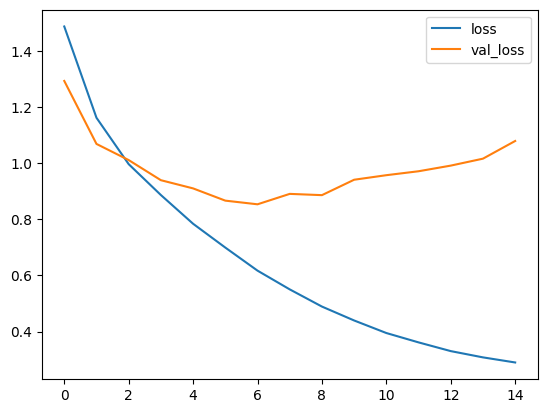

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

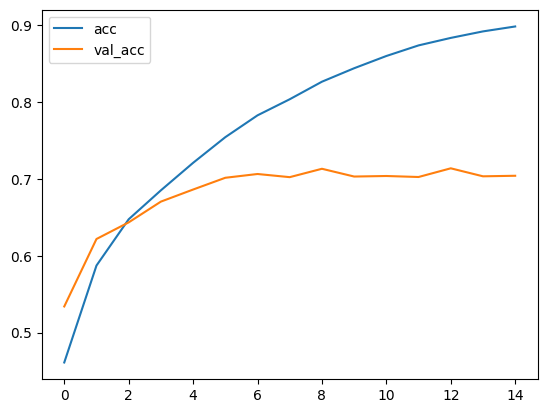

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[789  11  37  21  13   7  14  14  62  32]
 [ 23 842   9   9   1   4   8   3  29  72]
 [ 81   5 594  67  68  69  85  19   5   7]
 [ 33  13  54 522  56 177  87  37   9  12]
 [ 39   2  79  88 607  35  67  63  12   8]
 [ 19   5  49 217  39 563  37  54  10   7]
 [  6   9  24  72  22  30 814  12   6   5]
 [ 39   3  25  52  51  51  15 751   2  11]
 [ 69  34  20  23   6   8  12   5 801  22]
 [ 44 101   7  29   3  13  10  14  23 756]]


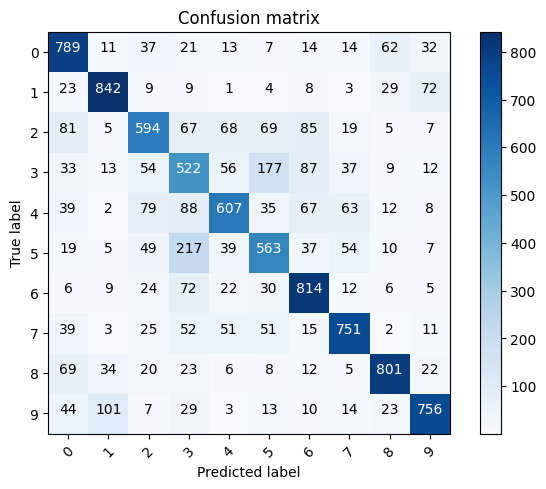

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

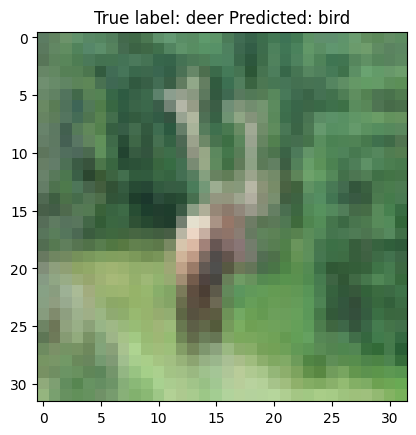

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));